In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def read_csv(csv_file):
    with open(csv_file, 'r') as file:
        data_list = []
        for line in file:
            rows = line.split(',')
            data_list.append(rows)
    return data_list

In [3]:
data = read_csv('IRIS.csv')
data[0:4]

[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species\n'],
 ['5.1', '3.5', '1.4', '0.2', 'Iris-setosa\n'],
 ['4.9', '3', '1.4', '0.2', 'Iris-setosa\n'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa\n']]

In [4]:
x = [(float(i[2]),float(i[3])) for i in data[1:]]

def dist(x,y):
    return (sum([(i - j) ** 2 for i, j in zip(x, y)]))**0.5

def mean(l):
    return (sum([i[0] for i in l])/len(l),sum([i[1] for i in l])/len(l))

In [5]:
def k_means(x,n_cluster,n_iter):
    plt.scatter(*zip(*x),c='black',label='data points')
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.legend()
    plt.show()
    centroids = random.sample(x, n_cluster)
    # print('initial centroids are -', centroids, '\n')
    for i in range(n_iter):
        print('iteration -',i,'\n')
        distance = [[dist(i,j) for j in centroids] for i in x]
        nearest = [centroids[i.index(min(i))] for i in distance]
        cluster = {}
        for i in centroids:
            cluster[i] = []
        for i in x:
            cluster[nearest[x.index(i)]].append(i)
        # print(cluster)
        labels=['cluster1','cluster2','cluster3']
        color=['red','green','blue']
        i = 0
        for k, v in cluster.items():
            plt.scatter(*zip(*v),c=color[i],label=labels[i])
            plt.scatter(k[0],k[1],marker = 'D',c='black')
            i = i+1
        plt.xlabel('petal_length')
        plt.ylabel('petal_width')
        plt.legend()
        plt.show()
        new_centroids = [mean(cluster[i]) for i in centroids]
        if centroids == new_centroids:
            break
        centroids = new_centroids
    return cluster

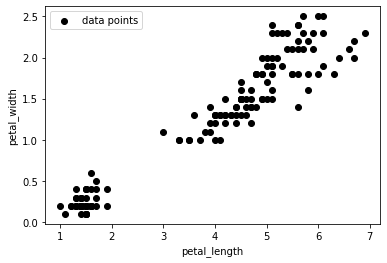

iteration - 0 



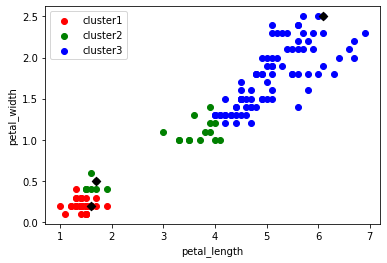

iteration - 1 



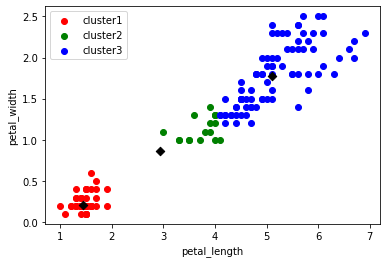

iteration - 2 



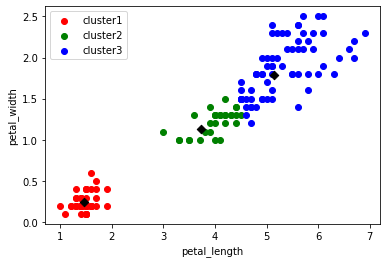

iteration - 3 



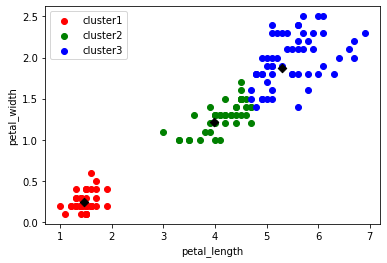

iteration - 4 



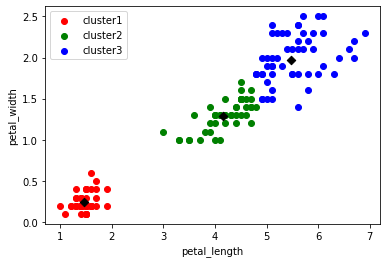

iteration - 5 



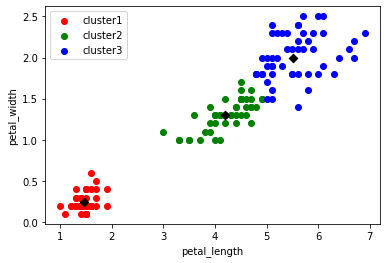

iteration - 6 



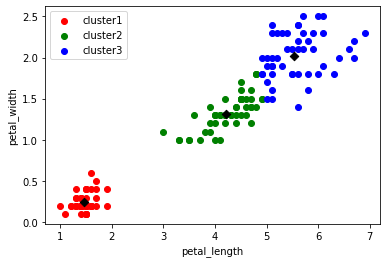

iteration - 7 



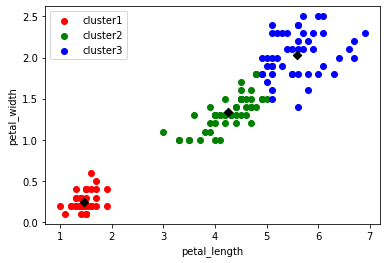

iteration - 8 



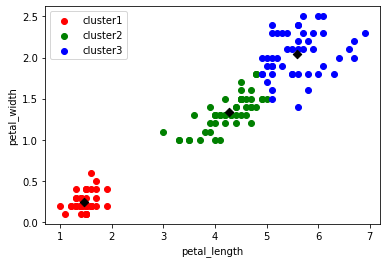

In [6]:
clusters = k_means(x,3,100)

In [7]:
print ('The final clusters are -')
for k, v in clusters.items():
    print(v)

The final clusters are -
[(1.4, 0.2), (1.4, 0.2), (1.3, 0.2), (1.5, 0.2), (1.4, 0.2), (1.7, 0.4), (1.4, 0.3), (1.5, 0.2), (1.4, 0.2), (1.5, 0.1), (1.5, 0.2), (1.6, 0.2), (1.4, 0.1), (1.1, 0.1), (1.2, 0.2), (1.5, 0.4), (1.3, 0.4), (1.4, 0.3), (1.7, 0.3), (1.5, 0.3), (1.7, 0.2), (1.5, 0.4), (1.0, 0.2), (1.7, 0.5), (1.9, 0.2), (1.6, 0.2), (1.6, 0.4), (1.5, 0.2), (1.4, 0.2), (1.6, 0.2), (1.6, 0.2), (1.5, 0.4), (1.5, 0.1), (1.4, 0.2), (1.5, 0.1), (1.2, 0.2), (1.3, 0.2), (1.5, 0.1), (1.3, 0.2), (1.5, 0.2), (1.3, 0.3), (1.3, 0.3), (1.3, 0.2), (1.6, 0.6), (1.9, 0.4), (1.4, 0.3), (1.6, 0.2), (1.4, 0.2), (1.5, 0.2), (1.4, 0.2)]
[(4.7, 1.4), (4.5, 1.5), (4.9, 1.5), (4.0, 1.3), (4.6, 1.5), (4.5, 1.3), (4.7, 1.6), (3.3, 1.0), (4.6, 1.3), (3.9, 1.4), (3.5, 1.0), (4.2, 1.5), (4.0, 1.0), (4.7, 1.4), (3.6, 1.3), (4.4, 1.4), (4.5, 1.5), (4.1, 1.0), (4.5, 1.5), (3.9, 1.1), (4.8, 1.8), (4.0, 1.3), (4.9, 1.5), (4.7, 1.2), (4.3, 1.3), (4.4, 1.4), (4.8, 1.4), (4.5, 1.5), (3.5, 1.0), (3.8, 1.1), (3.7, 1.0), (